# Code to import CSV File :

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


# Import all libraries :

In [4]:
import numpy as np                 
from scipy import stats          
import pandas as pd               

import matplotlib                 
import matplotlib.pyplot as plt
import seaborn as sns              

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("AB_NYC_2019.csv")

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Column information :

In [8]:
#id: listing ID
#name: name of the listing
#host_id: host ID
#host_name: name of the host
#neighbourhood_group: location
#neighbourhood: area
#latitude: latitude coordinates
#longitude: longitude coordinates
#room_type: listing space type
#price: price in dollars
#number_of_reviews: number of reviews
#last_review: latest review
#reviews_per_month: number of reviews per month
#calculated_host_listings_count: amount of listing per host
#availability_365: number of days when listing is available for booking

# Data Type :

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Checking for missing value :

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Replacing  missing values :

In [11]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

# Again check for missing value :

In [12]:
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Drop unwanted columns :

In [13]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

# Shape of the dataset :

In [14]:
df.shape

(48895, 12)

# All details of the dataset :

In [15]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 48895
Columns  : 12

Features :
     : ['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 0

Unique values :  
 host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# Visualization :

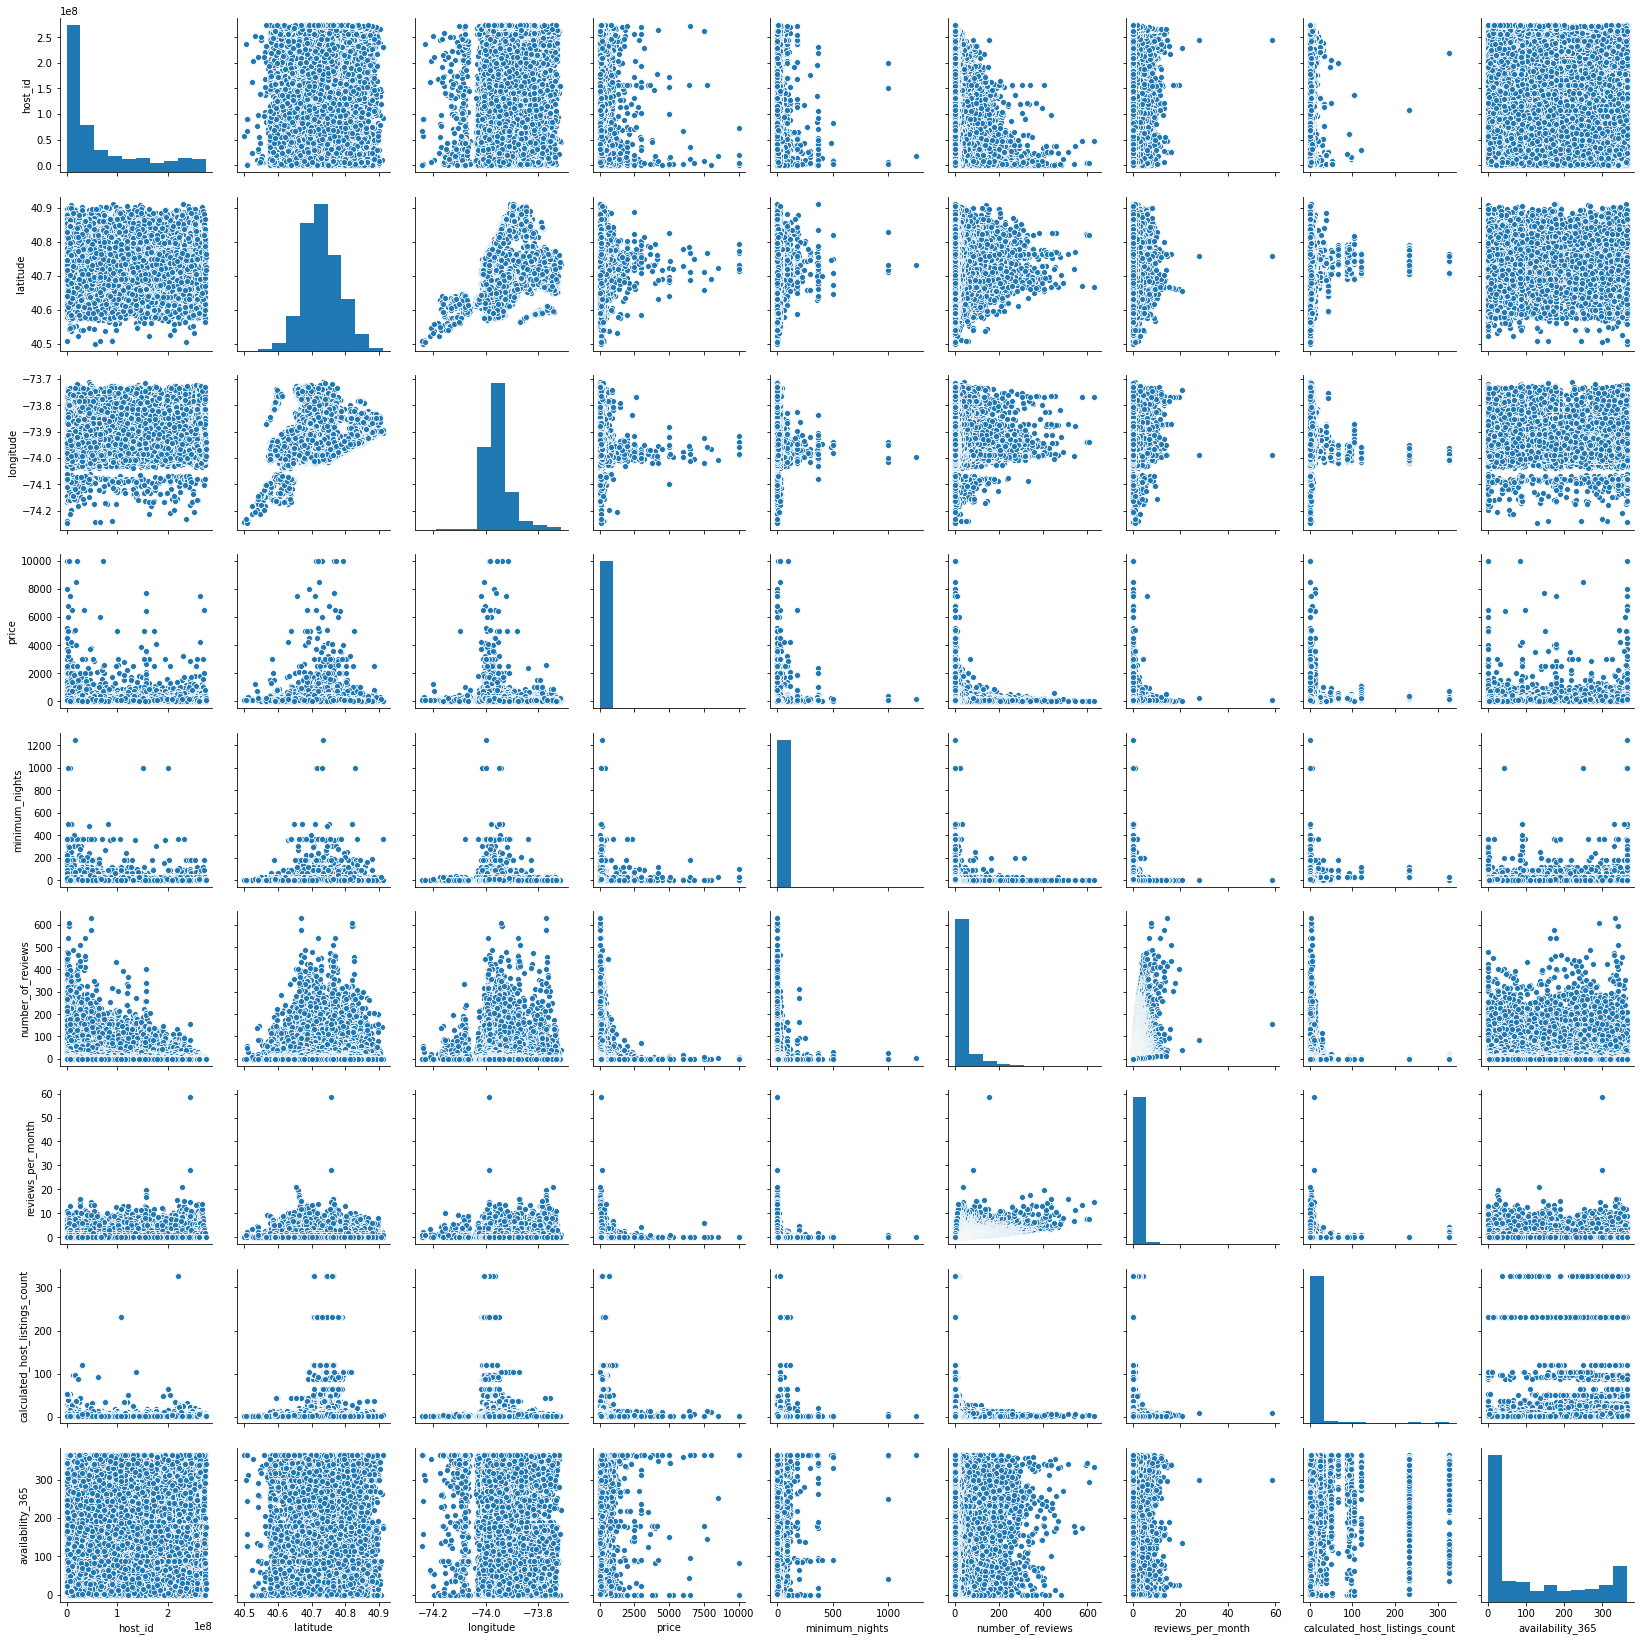

In [18]:
sns.pairplot(df)
plt.show()

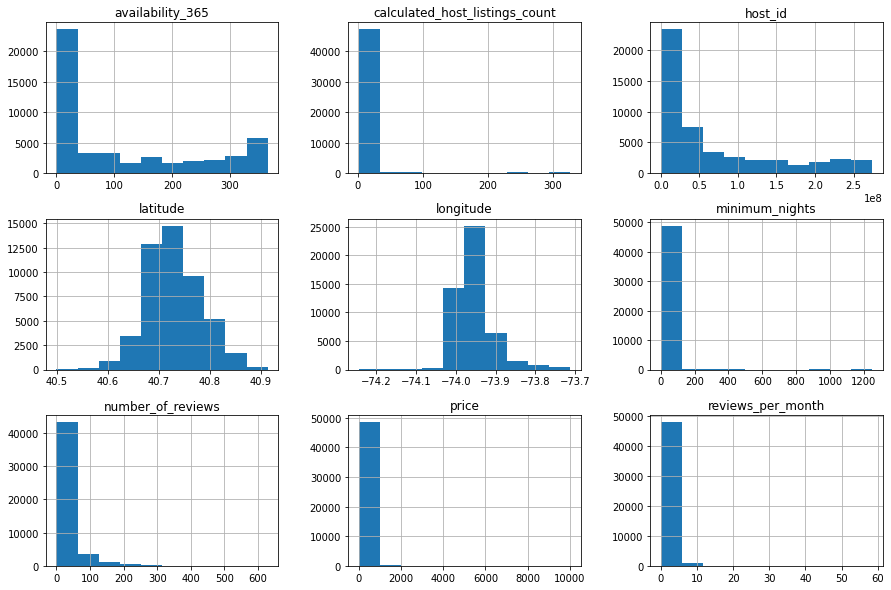

In [19]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

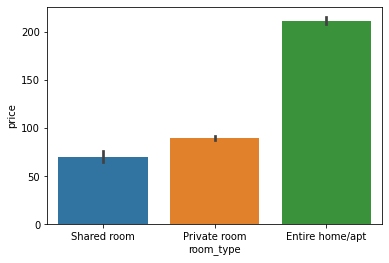

In [21]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type'])

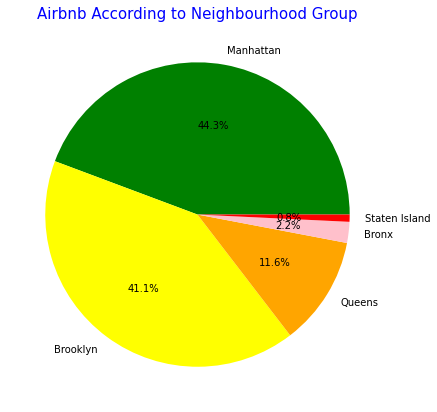

In [22]:
labels = df.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

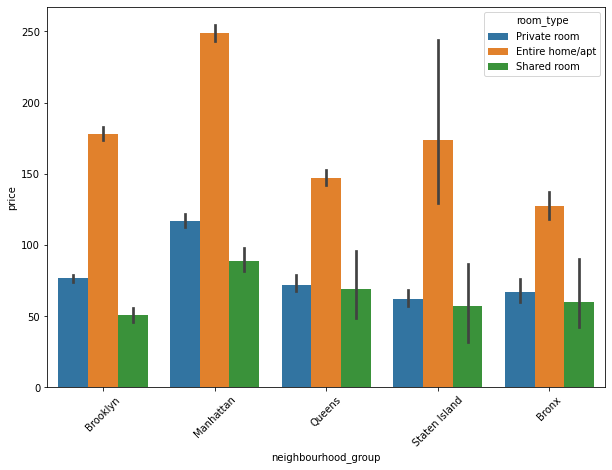

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

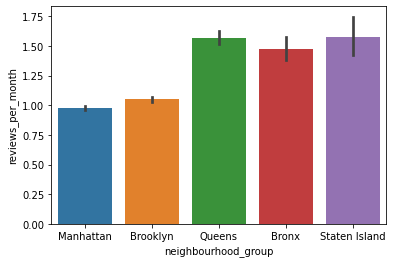

In [25]:
#neighbourhood_group - reviews_per_month
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) 
plt.show()

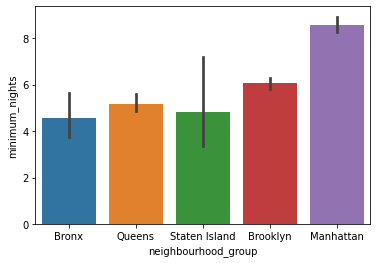

In [26]:
#neighbourhood_group - minimum_nights
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) 
plt.show()

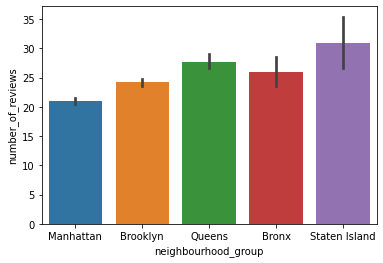

In [27]:
#neighbourhood_group - number_of_reviews
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group']) 
plt.show()

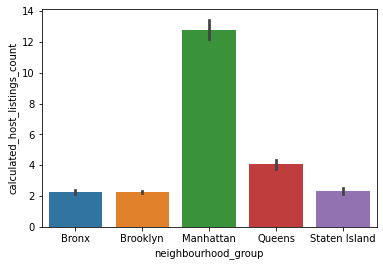

In [29]:
#neighbourhood_group - calculated_host_listings_count
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group']) 
plt.show()

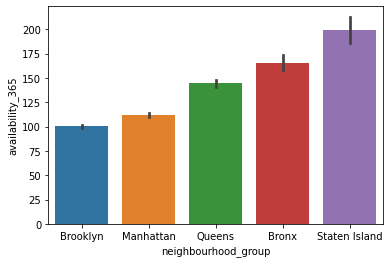

In [30]:
#neighbourhood_group - availability_365
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group']) 
plt.show()

# Corrleation :

In [32]:
corr=df.corr()

In [33]:
corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


# Corrleation using heatmap :

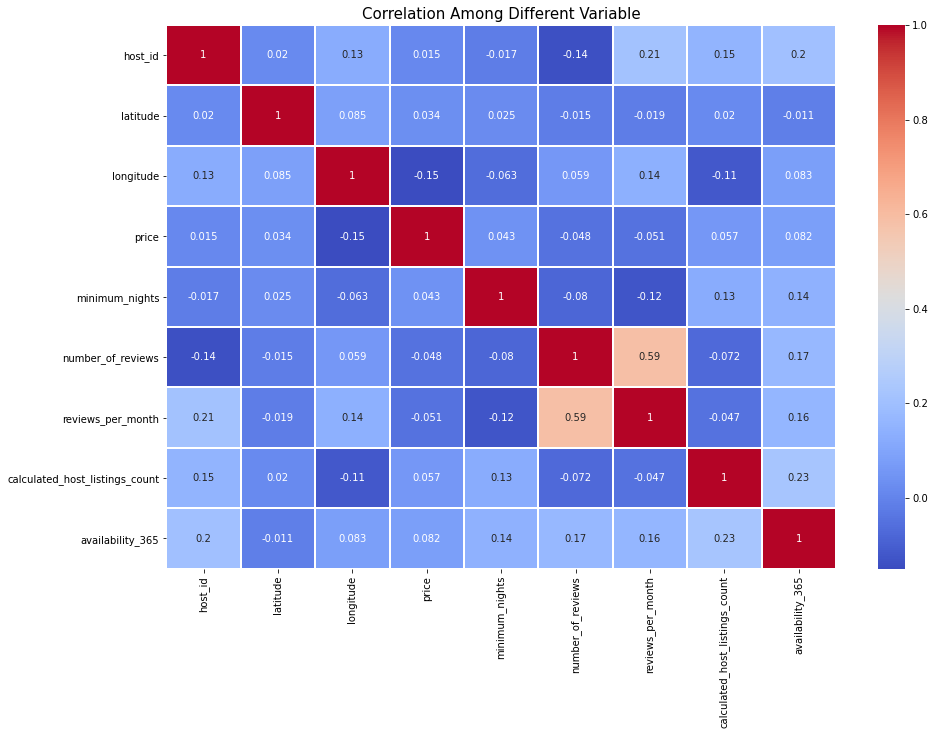

In [34]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',linewidth = 1)
plt.title("Correlation Among Different Variable",size=15);

# Seprating numarical and categorical data :

In [35]:
df_num = df.select_dtypes(["float64","int64"])

In [37]:
df_num.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [38]:
df_cat = df.select_dtypes(object)

In [39]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [40]:
le = LabelEncoder()

In [41]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [42]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0


# New Dataset :

In [43]:
df_new = pd.concat([df_cat,df_num],axis=1)

In [44]:
df_new.head()

,neighbourhood_group,neighbourhood,room_type,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2,127,0,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,2,94,1,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,1,41,0,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,2,61,0,7192,40.79851,-73.94399,80,10,9,0.10,1,0


# Defining X and y variable :

In [45]:
X = df_new.drop("price",axis=1)
y = df_new["price"]

# Spliting into training and testing models :

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Linear Regression :

In [49]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

print(model1.intercept_)
print(model1.coef_)

y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

-52453.284982196
[ 1.00478724e+01  1.00290934e-01 -1.04161241e+02  1.01280664e-07
  1.44188287e+02 -6.32042610e+02 -1.10410313e-01 -2.03606765e-01
 -4.67034755e+00 -1.30186785e-01  1.97577285e-01]
mse: 54332.28488107933, rmse: 233.09286750366115, r2: 0.078823975910572


# Random Forest Regressor :

In [76]:
model4=RandomForestRegressor(n_estimators = 30, random_state = 42)

model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 53034.02687542975, rmse: 230.29117845768593, r2: 0.10083527454276009


# With particular features and need to preprocesss the data :

In [78]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
df=df[df.price>0]
df=df[df.availability_365>0]

In [79]:
from sklearn.preprocessing import LabelEncoder
# Fit label encoder
le = LabelEncoder() 
# Transform labels to normalized encoding.
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    

le = LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le =LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
22835,97001292,3,104,40.69085,-73.79916,0,10,1,43,1.68,1,252
31407,91034542,2,111,40.74408,-73.97803,1,10,5,42,2.87,1,2
32810,167570251,1,188,40.66242,-73.99464,0,10,1,14,1.06,1,4
33225,197169969,3,104,40.68939,-73.79886,0,10,2,22,1.76,1,332
35386,47516406,3,215,40.69139,-73.86086,1,10,7,4,0.41,2,180


In [80]:
X = df[['neighbourhood_group','neighbourhood','room_type','number_of_reviews','reviews_per_month','availability_365']]
#The np.log10() method returns base-10 logarithm of x for x > 0
y=np.log10(df.price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Linear Regression :

In [81]:
model6 = LinearRegression()
model6.fit(X_train,y_train)

y_predicts = model6.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23578065291490327
        R2 Score: 41.0461361498634
        Mean Absolute Error: 0.17640746161192752
     


# Random Forest Regressor :

In [84]:
### Initially, lets build a tree without any constraints.
model8 = RandomForestRegressor(n_estimators=300)
model8.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
y_predicts = model8.predict(X_test)
# score() method to determine model accuracy
print(model8.score(X_train,y_train))

0.9194667585671353


In [86]:
y_predicts = model8.predict(X_test)

print("""
        Mean Squared Error: {}
        Mean Absolute Error: {}
        R2 Score: {}
        
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        mean_absolute_error(y_test,y_predicts),
        r2_score(y_test,y_predicts) * 100
        
        ))


        Mean Squared Error: 0.21102322866253126
        Mean Absolute Error: 0.15217152904010087
        R2 Score: 52.77668516342187
        
     


# Prediction :

In [89]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_predicts, 0)})
df

,Actual,Predicted
34969,69.0,45.0
36826,149.0,115.0
5146,195.0,142.0
28125,50.0,92.0
9134,75.0,81.0
...,...,...
28481,55.0,45.0
48152,99.0,134.0
48802,150.0,182.0
33827,65.0,67.0
